In [1]:
# To avoid the warning about the memory leak of KMeans (Win MKL version)  
import os
os.environ['OMP_NUM_THREADS'] = '1'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [2]:
# To show all rows/columns
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [3]:
# Load the diabetes dataset for scikit-learn toy datasets
diabetes = load_diabetes()

# Convert the dataset to a DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [4]:
dfX = df[["age","bmi"]]
display(dfX.head())

,age,bmi
0,0.038076,0.061696
1,-0.001882,-0.051474
2,0.085299,0.044451
3,-0.089063,-0.011595
4,0.005383,-0.036385


In [5]:
X_scaled = scale(dfX)

In [6]:
dfX_scaled = pd.DataFrame(X_scaled, columns=dfX.columns)
display(dfX_scaled.head())

,age,bmi
0,0.800500,1.297088
1,-0.039567,-1.082180
2,1.793307,0.934533
3,-1.872441,-0.243771
4,0.113172,-0.764944


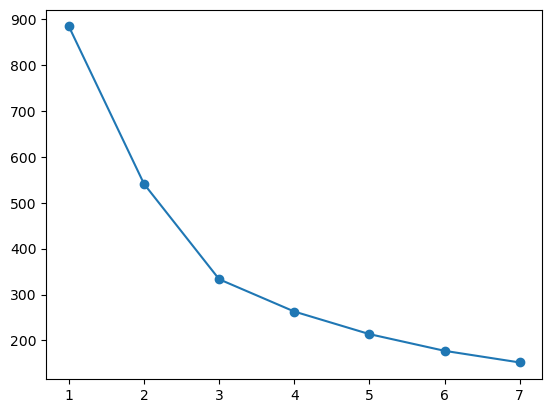

In [7]:
distortions = []
for k in range(1, 8):
    km = KMeans(n_clusters=k, n_init=15, random_state=11)
    km.fit(dfX_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1, 8), distortions, marker='o')

In [8]:
km_obj = KMeans(n_clusters=4, n_init=15, random_state=11)
cls = km_obj.fit_predict(dfX_scaled)

In [9]:
df["cls_num"] = cls
print(df["cls_num"].value_counts())

cls_num
1    179
3    107
2     88
0     68
Name: count, dtype: int64


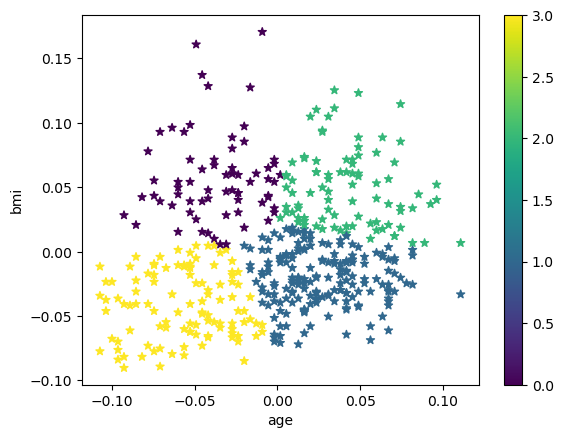

In [10]:
plt.scatter(df["age"],df["bmi"],marker='*',c=df["cls_num"])
plt.colorbar()
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()